## Plotting flux vs energy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [25]:
list_files = [glob.glob('proton/*.txt'), glob.glob('iron/*.txt')]
list_files

[['proton/p_DAMPE_SCIENCE2019_000.txt',
  'proton/p_AMS_PRL2015_ekin_000.txt',
  'proton/Proton-CALET-2022_000.txt',
  'proton/p_flux_CREAMIII_ApJ2017_000.txt'],
 ['iron/iron_CALET2021_000.txt',
  'iron/Fe_CREAMII_ApJ2009_000.txt',
  'iron/Fe_HESS_PRD2007_000.txt']]

In [26]:
particle = []
for files in list_files:
    part = []
    for file in files:
        f = open(file)
        lines = f.readlines()
        p = []
        for line in lines:
            if not line.startswith('#'):
                p.append([float(x) for x in line.split()])
        part.append(p)
    particle.append(part)

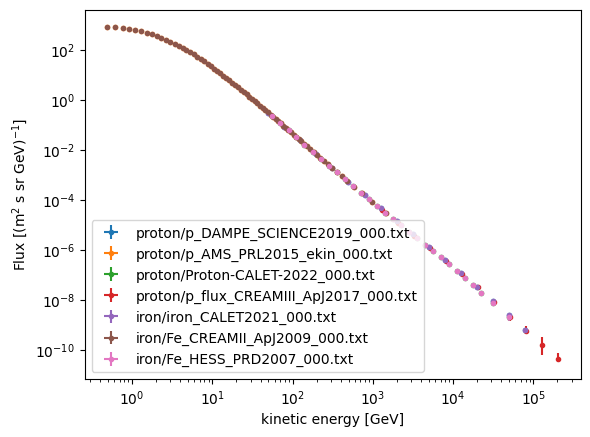

In [28]:
fig, ax = plt.subplots()
for files in list_files:
    for array, title in zip(proton, files):
        ax.errorbar(x=[a[0] for a in array], xerr=([a[1] for a in array], [a[2] for a in array]),
                    y=[a[3] for a in array], yerr=([a[4] for a in array], [a[5] for a in array]), fmt='.', label=('%s') % (title))#[7:-8]
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('kinetic energy [GeV]')
ax.set_ylabel('Flux [(m$^{2}$ s sr GeV)$^{-1}$]')
ax.legend()
#ax.set_xlim(1e3,)

In [85]:

f = open('proton/p_AMS_PRL2015_ekin_000.txt')
lines = f.readlines()
p_AMS = []
for line in lines:
    if not line.startswith('#'):
        p_AMS.append([float(x) for x in line.split()])

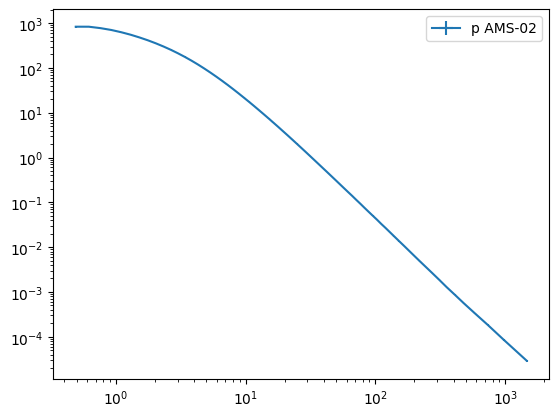

In [66]:
fig, ax = plt.subplots()
ax.errorbar(x=[a[0] for a in p_AMS], y=[a[3] for a in p_AMS], xerr=([a[1] for a in p_AMS],[a[2] for a in p_AMS]), yerr=([a[4] for a in p_AMS],[a[4] for a in p_AMS]), label='p AMS-02')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame(p_AMS)

In [46]:
df

,0,1,2,3,4,5
0,0.4924,0.0,0.0,830.400000,35.520000,35.520000
1,0.6207,0.0,0.0,829.600000,28.300000,28.300000
2,0.7637,0.0,0.0,770.900000,21.220000,21.220000
3,0.9252,0.0,0.0,701.300000,17.480000,17.480000
4,1.1050,0.0,0.0,624.100000,14.190000,14.190000
...,...,...,...,...,...,...
67,482.1000,0.0,0.0,0.000554,0.000014,0.000014
68,583.1000,0.0,0.0,0.000336,0.000009,0.000009
69,731.6000,0.0,0.0,0.000186,0.000006,0.000006
70,975.1000,0.0,0.0,0.000086,0.000004,0.000004
